Data cleaning and preparation by Danling.

The original dataset can cause encoding problems so I used Apple numbers to recode it.

## Data information
url: the url which fetches the data

id: the id of transaction

Lng: and Lat coordinates, using the BD09 protocol.

Cid: community id

tradeTime: the time of transaction

DOM: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market

followers: the number of people follow the transaction.

totalPrice: the total price

price: the average price by square

square: the square of house

livingRoom: the number of living room

drawingRoom: the number of drawing room

kitchen: the number of kitchen

bathroom the number of bathroom

floor: the height of the house. 

buildingType(cat): 
1. Tower: any structure that is relatively tall in proportion to the dimensions of its base
2. Bungalow: either a single story or has a second, half, or partial story, that is built into a sloped roof
3. Combination of plate and tower
4. Plate

constructionTime: the time of construction

renovationCondition(cat): 
1. other
2. rough
3. Simplicity
4. hardcover

buildingStructure(cat): 
1. including unknown
2. mixed
3. brick and wood
4. brick and concrete
5. steel
6. steel-concrete composite

ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.

elevator(cat) have ( 1 ) or not have elevator( 0 )

fiveYearsProperty(cat): if the owner have the property for less than 5 years

Data source:
https://www.kaggle.com/datasets/ruiqurm/lianjia

In [1]:
# A couple of libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import re
import itertools



/Users/test/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
bj = pd.read_csv('beijing_house_recoded.csv',on_bad_lines='skip')
bj.head()

/var/folders/5p/6_8hgsyd0llgwnlx97ckylhc0000gp/T/ipykernel_479/424483782.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  bj = pd.read_csv('beijing_house_recoded.csv',on_bad_lines='skip')


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [3]:
# Some columns that are useless by naked eye
bj.drop(columns=['url','id','price'], inplace = True)

In [4]:
bj.head()

,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,131.00,2,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,132.38,2,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,198.00,3,2,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,134.00,3,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,81.00,2,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [5]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   Cid                  318851 non-null  int64  
 3   tradeTime            318851 non-null  object 
 4   DOM                  160874 non-null  float64
 5   followers            318851 non-null  int64  
 6   totalPrice           318851 non-null  float64
 7   square               318851 non-null  float64
 8   livingRoom           318851 non-null  object 
 9   drawingRoom          318851 non-null  object 
 10  kitchen              318851 non-null  int64  
 11  bathRoom             318851 non-null  object 
 12  floor                318851 non-null  object 
 13  buildingType         316830 non-null  float64
 14  constructionTime     318851 non-null  object 
 15  renovationConditi

In [6]:
# Dealing with unreadable characters in floor cln
def get_num(x):
    if (type(x)== int) or (type(x)== float):
        num1 = x
    else:
        listx = re.findall(r'\d+', x)
        if len(listx) > 0:
            num = listx[0]
            try: 
                num1 = int(num)
            except:
                num1 = None
        else:
            num1 = None
    return num1

In [7]:
bj['floor'] 
# the floor originally looks like this

0         ¸ß 26
1         ¸ß 22
2          ÖÐ 4
3         µ× 21
4          ÖÐ 6
          ...  
318846     ÖÐ 5
318847    ÖÐ 24
318848     ÖÐ 7
318849     ÖÐ 5
318850    ÖÐ 17
Name: floor, Length: 318851, dtype: object

In [8]:
bj['floor'] = bj['floor'].apply(get_num)

In [9]:
bj['floor']
# now it is readable!!!

0         26.0
1         22.0
2          4.0
3         21.0
4          6.0
          ... 
318846     5.0
318847    24.0
318848     7.0
318849     5.0
318850    17.0
Name: floor, Length: 318851, dtype: float64

In [10]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   Cid                  318851 non-null  int64  
 3   tradeTime            318851 non-null  object 
 4   DOM                  160874 non-null  float64
 5   followers            318851 non-null  int64  
 6   totalPrice           318851 non-null  float64
 7   square               318851 non-null  float64
 8   livingRoom           318851 non-null  object 
 9   drawingRoom          318851 non-null  object 
 10  kitchen              318851 non-null  int64  
 11  bathRoom             318851 non-null  object 
 12  floor                318819 non-null  float64
 13  buildingType         316830 non-null  float64
 14  constructionTime     318851 non-null  object 
 15  renovationConditi

In [11]:
# Now clean up other object columns
print(bj['livingRoom'].unique())
print(bj['drawingRoom'].unique())
print(bj['bathRoom'].unique()) # there should never be houses with 1000+ bathrooms!!!
print(bj['constructionTime'].unique()) # there should never constructing time at 0 !!!


[2 3 1 4 5 6 9 0 7 8 '1' '4' '3' '2' '5' '7' '9' '6' '0' '#NAME?' '8']
[1 2 0 4 3 5 '0' '1' '2' '3' '4' 'ÖÐ 14' 'ÖÐ 15' 'ÖÐ 16' 'ÖÐ 6' '¸ß 14'
 '¶¥ 6' 'µÍ 6' 'µÍ 16' '¸ß 12' 'µÍ 15' '5' '¸ß 6' 'µ× 28' 'µ× 11' 'ÖÐ 24'
 'µ× 20' 'ÖÐ 22']
[1 2 3 0 4 5 6 7 2006 2003 1990 2000 1996 2005 2011 '1' '2' '0' '3' '4'
 '5' 'Î´Öª' 1994 2004 '2003' '7']
['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' 'Î´Öª' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1' '0'
 '1906' '1934' '1914']


In [12]:
bj['livingRoom'] = bj['livingRoom'].apply(get_num)

In [13]:
print(bj['livingRoom'].unique())

[ 2.  3.  1.  4.  5.  6.  9.  0.  7.  8. nan]


In [14]:
bj['drawingRoom'] = bj['drawingRoom'].apply(get_num)
print(bj['drawingRoom'].unique())

[ 1  2  0  4  3  5 14 15 16  6 12 28 11 24 20 22]


In [15]:
bj['bathRoom'] = bj['bathRoom'].apply(get_num)
print(bj['bathRoom'].unique())

[1.000e+00 2.000e+00 3.000e+00 0.000e+00 4.000e+00 5.000e+00 6.000e+00
 7.000e+00 2.006e+03 2.003e+03 1.990e+03 2.000e+03 1.996e+03 2.005e+03
 2.011e+03       nan 1.994e+03 2.004e+03]


In [16]:
bj['constructionTime'] = bj['constructionTime'].apply(get_num)
print(bj['constructionTime'].unique())

[2.005e+03 2.004e+03 2.008e+03 1.960e+03 1.997e+03 2.009e+03 2.006e+03
 1.991e+03 2.001e+03 1.990e+03 2.011e+03 2.000e+03 1.998e+03 2.010e+03
 1.996e+03 1.993e+03 2.002e+03       nan 2.012e+03 1.989e+03 2.003e+03
 2.007e+03 1.994e+03 1.984e+03 1.992e+03 2.014e+03 1.985e+03 2.013e+03
 1.999e+03 1.979e+03 1.981e+03 1.976e+03 1.982e+03 1.975e+03 1.983e+03
 1.986e+03 1.995e+03 1.965e+03 1.988e+03 1.987e+03 2.015e+03 1.955e+03
 1.980e+03 1.978e+03 1.958e+03 1.970e+03 1.956e+03 1.977e+03 1.964e+03
 1.963e+03 1.967e+03 2.016e+03 1.974e+03 1.973e+03 1.959e+03 1.954e+03
 1.962e+03 1.966e+03 1.957e+03 1.944e+03 1.972e+03 1.971e+03 1.953e+03
 1.968e+03 1.961e+03 1.950e+03 1.952e+03 1.933e+03 1.969e+03 1.000e+00
 0.000e+00 1.906e+03 1.934e+03 1.914e+03]


So the bad data have been corrected. However, no data have been removed, no matter how seemingly unreasonable they are.

In [17]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   Cid                  318851 non-null  int64  
 3   tradeTime            318851 non-null  object 
 4   DOM                  160874 non-null  float64
 5   followers            318851 non-null  int64  
 6   totalPrice           318851 non-null  float64
 7   square               318851 non-null  float64
 8   livingRoom           318819 non-null  float64
 9   drawingRoom          318851 non-null  int64  
 10  kitchen              318851 non-null  int64  
 11  bathRoom             318849 non-null  float64
 12  floor                318819 non-null  float64
 13  buildingType         316830 non-null  float64
 14  constructionTime     299568 non-null  float64
 15  renovationConditi

In [18]:
## Drop all Nan in bj_copy. 
bj_copy = bj.copy()
bj_copy.dropna(inplace = True)
bj_copy.head()

,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,131.00,2.0,1,...,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,132.38,2.0,2,...,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,198.00,3.0,2,...,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,134.00,3.0,1,...,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,81.00,2.0,1,...,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    bj_copy.drop(labels=['totalPrice','tradeTime'], axis=1),
    bj_copy['totalPrice'],
    test_size=0.2,
    random_state=23)

X_train.shape, X_test.shape

((121812, 21), (30454, 21))

In [20]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression()
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [21]:
k = 21

remaining_features = list(X_train.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X_train[list(combo) + features],y_train)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()
    

In [22]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [23]:
#Initializing useful variables
m = len(y_train)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[square],5.180898e+09,0.341582,1,42532.234238,2.188221,2.188301,0.341576
2,"[square, communityAverage]",2.795864e+09,0.644686,2,22952.922921,1.180894,1.181053,0.644680
3,"[square, communityAverage, DOM]",2.588938e+09,0.670983,3,21254.508760,1.093513,1.093752,0.670975
4,"[square, communityAverage, DOM, renovationCond...",2.459980e+09,0.687372,4,20196.168450,1.039063,1.039382,0.687361
5,"[square, communityAverage, DOM, renovationCond...",2.429686e+09,0.691221,5,19947.793834,1.026285,1.026683,0.691209
6,"[square, communityAverage, DOM, renovationCond...",2.399153e+09,0.695102,6,19697.453836,1.013405,1.013883,0.695087
7,"[square, communityAverage, DOM, renovationCond...",2.386500e+09,0.696710,7,19593.903708,1.008077,1.008635,0.696692
8,"[square, communityAverage, DOM, renovationCond...",2.379646e+09,0.697581,8,19537.954191,1.005199,1.005837,0.697561
9,"[square, communityAverage, DOM, renovationCond...",2.375677e+09,0.698085,9,19505.687611,1.003539,1.004256,0.698063
10,"[square, communityAverage, DOM, renovationCond...",2.372291e+09,0.698516,10,19478.207231,1.002125,1.002922,0.698491


In [24]:
# split the tradeTime column into its year, month, and day; drop the tradeTime column
bj_copy[['tradeYear', 'tradeMonth', 'tradeDay']] = bj_copy['tradeTime'].str.split('-', expand=True) 
bj_copy.drop('tradeTime', axis=1, inplace=True)
bj_copy.head()

,Lng,Lat,Cid,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,tradeYear,tradeMonth,tradeDay
0,116.475489,40.019520,1111027376244,1464.0,106,415.0,131.00,2.0,1,1,...,6,0.217,1.0,0.0,1.0,7,56021.0,2016,08,09
1,116.453917,39.881534,1111027381879,903.0,126,575.0,132.38,2.0,2,1,...,6,0.667,1.0,1.0,0.0,7,71539.0,2016,07,28
2,116.561978,39.877145,1111040862969,1271.0,48,1030.0,198.00,3.0,2,1,...,6,0.500,1.0,0.0,0.0,7,48160.0,2016,12,11
3,116.438010,40.076114,1111043185817,965.0,138,297.5,134.00,3.0,1,1,...,6,0.273,1.0,0.0,0.0,6,51238.0,2016,09,30
4,116.428392,39.886229,1111027381174,927.0,286,392.0,81.00,2.0,1,1,...,2,0.333,0.0,1.0,1.0,1,62588.0,2016,08,28


In [25]:
def plot_cat(feature, response=y_train, df=bj_copy):
    x=df[feature]
    y=response
    plt.rcParams['figure.figsize'] = (10, 7)
    sns.barplot(x=x,y=y,color='crimson')
    
    plt.title('money_made_inv against '+ feature)
    plt.show()

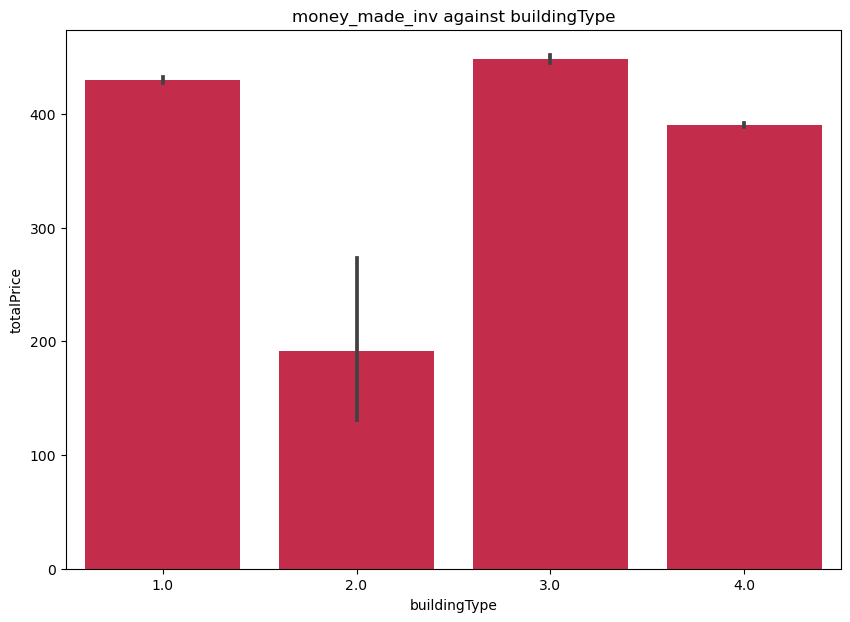

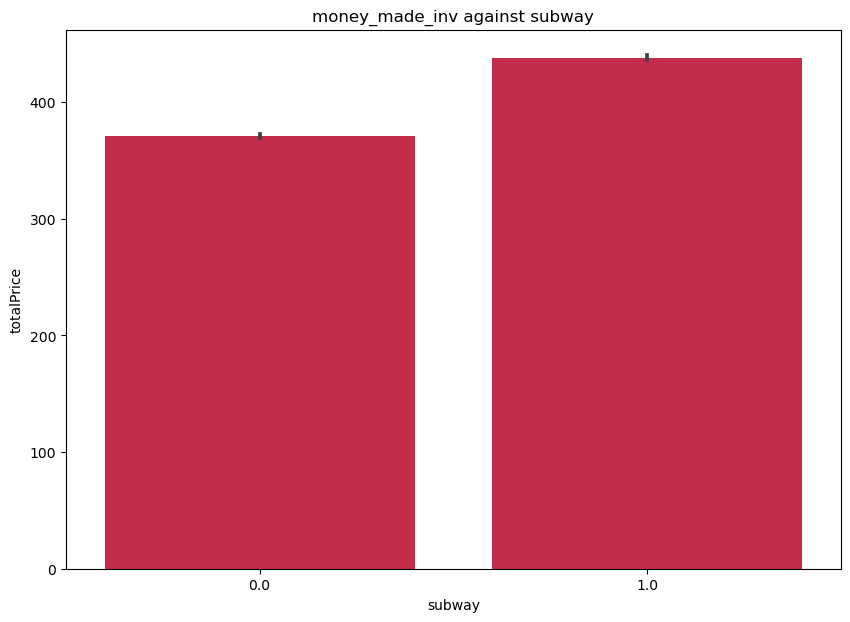

In [ ]:
cats = ['buildingType','subway','renovationCondition','buildingStructure']
for cat in cats:
    plot_cat(cat)

In [ ]:
# Create bins for Construction Time
cons_bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2017]
cons_labels = ["1950-1960", "1961-1970","1971-1980", "1981-1990", "1991-2000", "2001-2010", "2011-2016"]
Binned_construction_time = pd.cut(bj_copy.constructionTime,bins = cons_bins, labels = cons_labels, retbins=True)
bj_copy['Binned_construction_time'] = Binned_construction_time[0]